# Machine learning

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mathbf{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

___

<br>

## Data fitting

- we think $y\in\R$ and $x\in\R^d$ are (approximately) related by

$$
y \approx f(x)
$$

- $x$ is called the _independent variable_ or _feature vector_

- $y$ is called the _outcome_ or _response_
or _target_ or _label_ or _dependent variable_

- often $y$ is something we want to predict

- we don't know the "true" relationship between $x$ and $y$


<br>

___

<br>

## Features

Often $x$ is a vector of features:

_Documents:_

- $x$ is word count histogram for a document

_Patient data:_

- $x$ are patient attributes, test results, symptoms

_Customers:_

- $x$ is purchase history and other attributes of a customer


<br>

### Where features come from

- we use $u$ to denote the raw input data, such as a vector, word or text,
 image, video, audio, ...

- $x = \phi(u)$ is the corresponding _feature vector_

- the function $\phi$ is called the _embedding_ or _feature function_

- $\phi$ might be very simple or quite complicated

- similarly, the raw output data $v$ can be featurized as $y=\psi(v)$

- often we take $\phi(u)_1=x_1=1$, the _constant feature_


<br>

### Data and prior knowledge

- we are given data $x^1,\dots,x^n \in \R^d$ and $y^1,\dots,y^n \in \R$

- $(x^i,y^i)$ is the $i$th _data pair_ or _observation_ or _example_

- we also (might) have _prior knowledge_ about what $f$ might look like, e.g., $f$ is smooth or continuous:
  $f(x) \approx f(\tilde x)$ when $x$ is near $\tilde x$, or we might know $y\geq 0$


<br>

___

<br>

## Predictor

- we seek a _predictor_ or _model_ $g:\R^d \rightarrow \R$

- for feature vector $x$, our prediction (of $y$) is $\hat y = g(x)$

- predictor $g$ is chosen based on both data and prior knowledge

- in terms of raw data, our predictor is

$$
\hat v = \psi^{-1}\left(g\left(\phi(u)\right)\right)
$$

- $\hat y^i \approx y^i$ means our predictor does well on $i$th data pair

- but **our real goal is to have $\hat y \approx y$
for  $(x,y)$ pairs we have not seen**

<center>
<img src="https://jonghank.github.io/ee370/files/raw_data.png" width="400">
<img src="https://jonghank.github.io/ee370/files/polynomial_fit.png" width="400">
</center>



<br>

### Information flow

<center>
<img src="https://jonghank.github.io/ee370/files/information_flow.png" width="600">
</center>

<br>

___

<br>

## Linear predictor

- predictors that are linear functions of $x$ are widely used

- a linear predictor has the form
$$
 g(x) =  \theta^T x
 $$
for some vector $\theta\in \R^d$, called the _predictor parameter vector_

- also called a _regression model_

- $x_j$ is the $j$th feature, so the prediction is a linear combination of features
$$
\hat y = g(x) = \theta_1 x_1 + \cdots + \theta_d x_d
$$

- we get to choose the predictor parameter vector $\theta \in \R^d$

- sometimes we write $g_\theta(x)$ to emphasize the dependence on $\theta$


<br>

### Interpreting a linear predictor

$$
\hat y = g(x) = \theta_1 x_1 + \cdots + \theta_d x_d
$$

- $\theta_3$ is the amount that prediction $\hat y = g(x)$ increases when $x_3$ increases by $1$

- $\theta_7=0$ means that the prediction does not depend on $x_7$

- $\theta$ small means predictor is insensitive to changes in $x$:
$$
|g(x)-g(\tilde x)| = \left| \theta^T x - \theta^T \tilde x \right|
= \left| \theta^T (x - \tilde x) \right| \leq \|\theta \|\; \|x-\tilde x\|
$$


<br>

### Affine predictor

- suppose the first feature is constant, $x_1=1$

- the linear predictor $g$ is then an _affine function_ of
  $x_{2:d}$, i.e., linear plus a constant
$$
g(x) = \theta ^T  x = \theta_1 + \theta_2 x_2 + \cdots+ \theta_dx_d
$$

- $\theta_1$ is called the _offset_ or _constant term_
in the predictor

- $\theta_1$ is the prediction when all
features (except the constant) are zero


<br>

___

<br>

## Empirical risk minimization

<br>

### Loss function

- a _loss_ or _risk_  function  $\loss:\R \times \R \to \R$ quantifies how well (more accurately, how badly)  $\hat y$ approximates $y$

- smaller values of $\loss(\hat y, y)$ indicate that $\hat y$ is a good
approximation of $y$

- typically $\loss(y,y)=0$ and $\loss(\hat y,y)\geq 0$ for all $\hat y$, $y$

<br>

**Examples**

- _quadratic loss_:

$$\loss(\hat y, y) = (\hat y - y)^2$$

- _absolute loss_:

$$\loss(\hat y,y)=|\hat y-y|$$

- _fractional error_: for $\hat y, y >0$,
$$
  \loss(\hat y, y) = \max\left\{\frac{\hat y}{y}-1, \frac{y}{\hat y}-1\right\}
  = \exp \left(\abs{\log \hat y - \log y} \right) -1
$$
(often scaled by 100 to become _percentage error_)



<br>

### Empirical risk

how well does the predictor $g$ fit a data set
$(x^i,y^i)$, $i=1, \ldots, n$, with loss $\ell(\cdot,\cdot)$?

- the _empirical risk_ is the average loss over the data points,

$$
\eloss = \frac{1}{n} \sum_{i=1}^n \loss \left( \hat y^i , y^i \right)
= \frac{1}{n} \sum_{i=1}^n \loss \left( g(x^i) , y^i\right)
$$

- if $\eloss$ is small, the predictor predicts the given data well

- when the predictor is parametrized by $\theta$, we write
$$
\eloss(\theta) = \frac{1}{n} \sum_{i=1}^n \loss \left( g_\theta(x^i) , y^i\right)
$$
to show the dependence on the predictor parameter $\theta$


<br>

### Mean square error

- for square loss $\loss (\hat y, y) = (\hat y-y)^2$, empirical risk is
_mean-square error_ (MSE)

$$
  \eloss = \text{MSE} =  \frac{1}{n} \sum_{i=1}^n \left(g(x^i)- y^i\right)^2
$$

- often we use root-mean-square error,
$\text{RMSE} = \sqrt{\text{MSE}}$,
which has same units/scale as outcomes $y^i$


<br>

### Mean absolute error

- for absolute value $\loss (\hat y, y) = |\hat y-y|$, empirical risk is _mean-absolute error_

$$
  \eloss = \frac{1}{n} \sum_{i=1}^n |g(x^i)- y^i|
$$

- has same units/scale as outcomes $y^i$
- similar to, but not the same as, mean-square error


<br>

### Empirical risk minimization

how do we pick our prediction rule $g$?

- choosing the parameter $\theta$ in a parametrized
predictor $g_\theta(x)$ is called _fitting the predictor_ (to data)

- _empirical risk minimization (ERM)_ is a general method for fitting a parametrized predictor


- ERM: _choose $\theta$ to minimize
empirical risk $\eloss(\theta)$_

- thus, ERM chooses $\theta$ by attempting to match given data

- for the linear predictor $g_\theta(x)=\theta^T x$, we have

$$
\eloss(\theta) = \frac{1}{n} \sum_{i=1}^n \loss (\theta^T x^i , y^i)
$$

- often there is no analytic solution to this minimization problem, so we use _numerical optimization_ to find $\theta$ that minimizes $\eloss(\theta)$



<br>

___

<br>

## Least squares linear regression

- linear predictor $\hat y = g_\theta(x) =  \theta^\tp x$

- $\theta \in \R^d$ is the model parameter

- we'll use square loss function $\loss(\hat y, y) = (\hat y - y)^2$

- empirical risk is MSE

$$
\eloss(\theta) = \frac{1}{n} \sum_{i=1}^n \left(\theta^\tp x^i - y^i\right)^2
$$

-  ERM: choose model parameter $\theta$ to minimize MSE

- called _linear least squares fitting_
or _linear regression_


<br>

### Least squares formulation

- express MSE in matrix notation as

\begin{align*}
 \frac{1}{n} \sum_{i=1}^n (\theta^\tp x^i -y^i)^2
 &= \frac{1}{n}\left\{ (\theta^Tx^1-y^1)^2 + \cdots (\theta^Tx^n-y^n)^2 \right\} \\
 &= \frac{1}{n}\left\{ ((x^1)^T\theta-y^1)^2 + \cdots ((x^n)^T\theta-y^n)^2 \right\} \\
 &=\frac{1}{n} \left\|\, \bmat{(x^1)^T\theta-y^1 \\ \vdots \\ (x^n)^T\theta-y^n }\, \right\|^2\\
 &=\frac{1}{n} \left\|\,\bmat{(x^1)^T \\ \vdots \\ (x^n)^T }\theta - \bmat{y^1 \\ \vdots \\ y^n}\,\right\|^2\\
 &= \frac{1}{n} \norm{X \theta - y}^2
\end{align*}

where $X\in\R^{n \times d}$ and $y\in\R^n$ are

$$
X = \bmat{(x^1)^\tp \\ \vdots \\ (x^n)^\tp} \qquad y = \bmat{y^1 \\ \vdots \\ y^n}
$$

- ERM is a _least squares problem_: choose $\theta$ to minimize $\|X \theta - y\|^2$
(factor $1/n$ doesn't affect choice of $\theta$)


<br>

### Least squares solution

- the least squares problem: choose $\theta$ to minimize $\norm{X\theta-y}^2$

- $X \in\R^{n \times d}$ is square or tall ($d \leq n$)

- $\norm{X\theta-y}^2$ is called the _objective function_

- assuming $X$ has linearly independent columns (which implies $n \geq d$), there is a unique optimal $\theta$

$$
\theta^* = (X^\tp X)^{-1}X^\tp y= X^\dagger y
$$

- you are not recommended to explicitly form $X^\dagger=(X^\tp X)^{-1}X^\tp$; there are more efficient algorithms computing the least squares solution without explicitly using the above

- for example in Python, a `numpy` function `numpy.linalg.lstsq` efficiently solves it


<br>

___

<br>

## Numerical examples

### Polynomial fit

The following downloads a `csv` file from a webpage. It contains raw data, $u$, and raw data, $v$, for which we'd like to build a prediction model that describes the functional relations from $u$ to $v$.

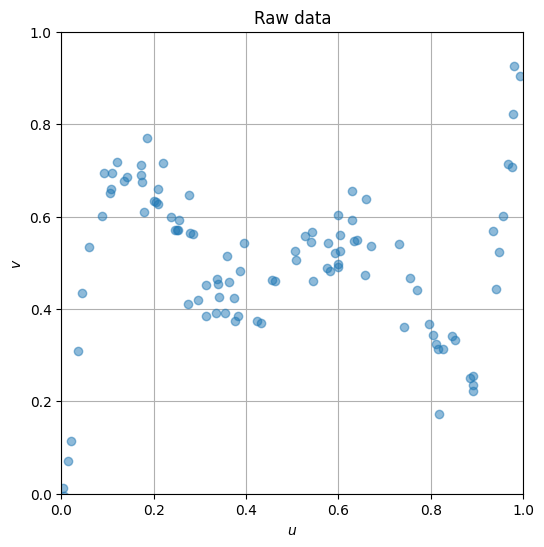

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('https://jonghank.github.io/ase3001/files/fit_data.csv', \
                  delimiter=',')
u, v = data[:,0], data[:,1]

plt.figure(figsize=(6,6), dpi=100)
plt.plot(u, v, 'o', alpha=0.5)
plt.grid()
plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.title('Raw data')
plt.show()

We will fit the data to a 5th order polynomial model,

\begin{align*}
  \hat{v} &= \theta_0 + \theta_1 u + \theta_2 u^2 + \theta_3 u^3 + \theta_4 u^4 + \theta_5 u^5 \\
  &= \bmat{1 & u & u^2 & u^3 & u^4 & u^5 }\bmat{\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5}
\end{align*}

so we will find $\theta = \bmat{\theta_0 & \cdots &  \theta_5}^T$ such that $\hat{v}$ is overall close enough to $v$ for all given data points. In other words we'd like to find  $\theta$ that minimizes

\begin{align*}
\eloss\left(\theta\right) &= \sum_{i=1}^{n} \left(\hat{v}^i-v^i\right)^2 \\
&= \sum_{i=1}^{n} \left( \bmat{1 & u^i & (u^i)^2 & (u^i)^3 & (u^i)^4 & (u^i)^5}
\bmat{\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5} - v^i \right)^2 \\
&= \left\| \bmat{1 & u^1 & (u^1)^2 & (u^1)^3 & (u^1)^4 & (u^1)^5 \\
1 & u^2 & (u^2)^2 & (u^2)^3 & (u^2)^4 & (u^2)^5 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & u^n & (u^n)^2 & (u^n)^3 & (u^n)^4 & (u^n)^5 }
\bmat{\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5} - v^i  \right\|_2^2  \\
&= \left\| X \theta - y \right\|_2^2  \end{align*}

where

$$
  X = \bmat{1 & u^1 & (u^1)^2 & (u^1)^3 & (u^1)^4 & (u^1)^5 \\
1 & u^2 & (u^2)^2 & (u^2)^3 & (u^2)^4 & (u^2)^5 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & u^n & (u^n)^2 & (u^n)^3 & (u^n)^4 & (u^n)^5 }
, \qquad
y = \bmat{v^1 \\ v^2 \\ \vdots \\ v^n}
$$

Optimal theta: [-1.08775601e-01  1.51579304e+01 -9.49190641e+01  2.39806312e+02
 -2.64399727e+02  1.05545151e+02]


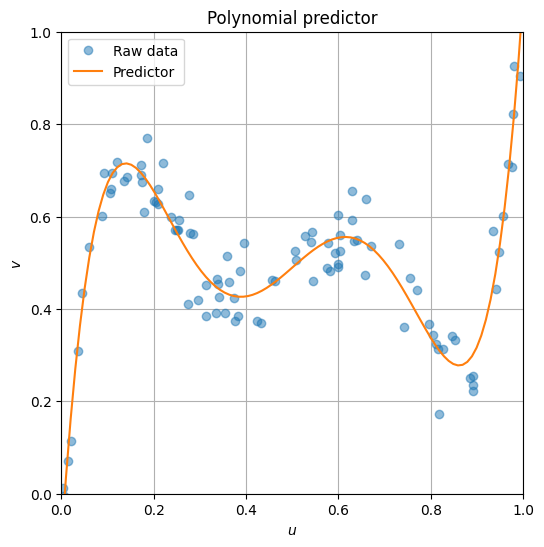

In [ ]:
n = len(u)
d = 6

X = np.zeros((n,d))
for i in range(d):
  X[:,i] = u**i

y = v

theta_opt = np.linalg.lstsq(X, y, rcond=None)[0]

print(f'Optimal theta: {theta_opt}')

vp = np.linspace(0, 1, 100)

X_vp = np.zeros((len(vp),d))
for i in range(d):
  X_vp[:,i] = vp**i;

plt.figure(figsize=(6,6), dpi=100)
plt.plot(u, v, 'o', alpha=0.5, label='Raw data')
plt.plot(vp, np.dot(X_vp, theta_opt), label='Predictor')
plt.grid()
plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.title("Polynomial predictor")
plt.legend()
plt.show()

### Diabete progression

The following loads a list of medical records collected from 442 patients, where each row corresponds to a patient's medical record, with the first 10 columns standing for the 10 explanatory variables (age, bmi, bp, ... ), and the last column being the outcome $y$, the measure of diabetes pregression over a year.


In [ ]:
import pandas as pd

df = pd.read_csv('https://jonghank.github.io/ase3001/files/diabetes_data.txt', \
                 delimiter='\t')

df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


We'd like to fit a linear model that predicts the measure of diabete progression over a year, from those 10 features (plus a constant feature).

In [ ]:
n, d = df.shape
X = np.hstack((np.ones((n,1)), df.values[:,:-1]))
y = df.values[:,-1]

theta_opt = np.linalg.lstsq(X, y, rcond=None)[0]

MSE = np.linalg.norm(X.dot(theta_opt)-y)**2/n

print(f'MSE: {MSE}')

MSE: 2859.6963475867506


The following shows the prediction performance where the scatter points on the black line ($\hat{y}=y$) imply perfect prediction.

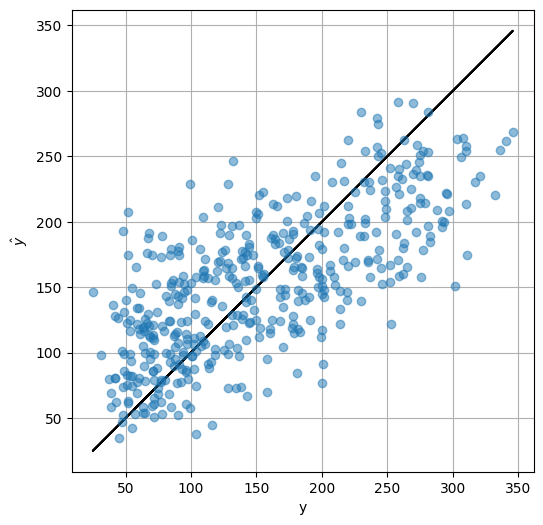

In [ ]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(y, y, 'k')
plt.plot(y, X.dot(theta_opt), 'o', alpha=0.5)
plt.xlabel('y')
plt.ylabel(r'$\hat{y}$')
plt.axis('square')
plt.grid()

Now suppose we got a new medical record ($X_\text{new}$) from a new patient. The predicted diabete progress for the patient over the next year can be easily assed by the following, $\hat{y}_\text{new}=X_\text{new}\theta^*$. So you can get a rough idea on how much for this patient the diabetes will progress.

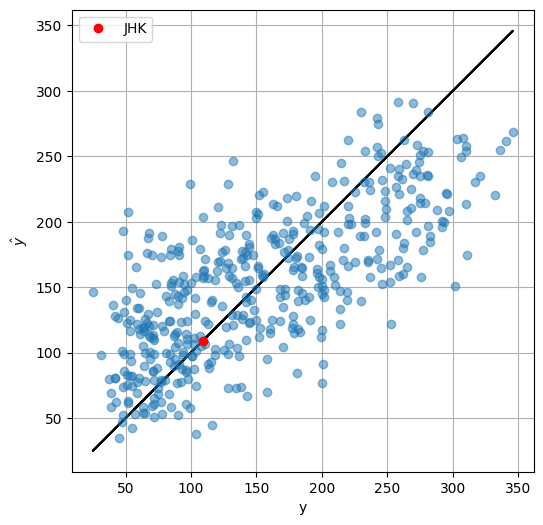

In [ ]:
# note that each feature represents
# u1:  age
# u2:  sex
# u3:  bmi         body mass index
# u4:  map	       mean arterial pressure
# u5:  s1 (tc) :   total cholesterol
# u6:  s2 (ldl):   low density lipoprotein
# u7:  s3 (hdl):   high density lipoprotein
# u8:  s4 (tch):
# u9:  s5 (ltg):
# u10: s6 (glu):
# features:      age  sex      bmi   map      tc      ldl     hdl   tch       ltg    glu
X_JHK = np.array([41,   1,    18.3,   90,    171,    80.0,   74.9,    2,     4.75,  90.0])
X_JHK = np.hstack((1, X_JHK))

y_JHK = X_JHK.dot(theta_opt)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(y, y, 'k')
plt.plot(y, X.dot(theta_opt), 'o', alpha=0.5)
plt.plot(y_JHK, y_JHK, 'ro', label='JHK')
plt.xlabel('y')
plt.ylabel(r'$\hat{y}$')
plt.legend()
plt.axis('square')
plt.grid()

<br>

___

<br>

## Classification

<br>

### Binary classification problem

We are given a set of data points $\left(x^{(i)},y^{(i)}\right)$, $i=1,\ldots, n$. The $x^{(i)} \in\R^d$ are feature vectors, while the $y^{(i)} \in \{\pm 1\}$ are associated boolean outcomes.

Our goal is to construct a good linear classifier $\hat{y}={\rm sign}(\tilde{y})$ based on the affine function $\tilde y = (w^T x - b)$,
and we would like to find the classifier parameters $w$ and $b$ that make $\hat{y}^{(i)}$ and $y^{(i)}$ as close as possible for all $i$.

For this purpose, we define the loss function $\ell\left(\tilde{y}^{(i)}\right)$ that roughly tells how much $\hat{y}^{(i)}$ is close to ${y}^{(i)}$,
and finally we find the optimal $w$ and $b$ that minimize the sum of the loss functions over all the given data set, $\left(x^{(i)},y^{(i)}\right)$, $i=1,\ldots, n$.

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \ell \left(\tilde{y}^{(i)}\right)
\end{aligned}



<br>

### Support vector machine

For this purpose, we define the following two different loss functions for each class.

- For negative data, $y^{(i)}=-1$,

$$
  \ell\left(\tilde{y}\right) = \left(1+\tilde{y}\right)_+
$$

- For positive data, $y^{(i)}=1$,

$$
  \ell\left(\tilde{y}\right) = \left(1-\tilde{y}\right)_+
$$

<br>

The following cell displays these.

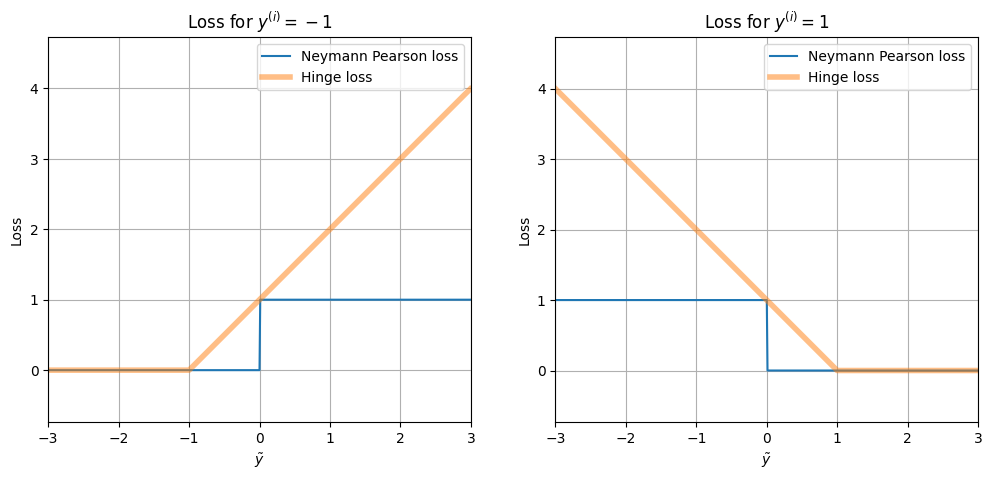

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

yhat = np.arange(-3, 3, 0.01)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(yhat, (yhat>0), label='Neymann Pearson loss')
plt.plot(yhat, np.maximum(1+yhat,0), alpha=0.5, linewidth=4, label='Hinge loss')
plt.grid(), plt.legend(), plt.axis('equal'), plt.xlim(-3, 3)
plt.xlabel(r'$\tilde{y}$'), plt.ylabel('Loss')
plt.title('Loss for $y^{(i)}=-1$')
plt.subplot(122)
plt.plot(yhat, (yhat<0), label='Neymann Pearson loss')
plt.plot(yhat, np.maximum(1-yhat,0), alpha=0.5, linewidth=4, label='Hinge loss')
plt.grid(), plt.legend(), plt.axis('equal'), plt.xlim(-3, 3)
plt.xlabel(r'$\tilde{y}$'), plt.ylabel('Loss')
plt.title('Loss for $y^{(i)}=1$')
plt.show()

<br>

The classification problem was

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \ell \left(\tilde{y}^{(i)}\right)
\end{aligned}

which is identical to

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_{i:y^{(i)}=-1}  \left(1+\tilde{y}^{(i)}\right)_+ + \sum_{i:y^{(i)}=1} \left(1-\tilde{y}^{(i)}\right)_+
\end{aligned}

This is again equal to

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \left(1 - y^{(i)} \left( w^T x^{(i)}-b\right) \right)_+
\end{aligned}

and with a 2-norm regularizer, we have the following problem.

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \left(1 - y^{(i)} \left( w^T x^{(i)}-b\right) \right)_+ + \lambda
\| w\|_2^2
\end{aligned}

<br>

The first term is the sum of the hinge loss values. The second term shrinks $w$ so that the margin of the classifier is maximized. The scalar $\lambda \geq 0$ is a (regularization) parameter. The above convex programming  simultaneously selects features and fits the classifier.



<br>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" width="300">
<figcaption>Image by By Larhmam - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=73710028 </figcaption>
</center>

<br>


<br>

The following presents an example with a 2 dimensional linearly separable dataset. Note that the loss term

$$\sum_i \left(1 - y^{(i)} \left( w^T x^{(i)}-b\right) \right)_+$$

can be made zero, while maximizing the classifier margin.




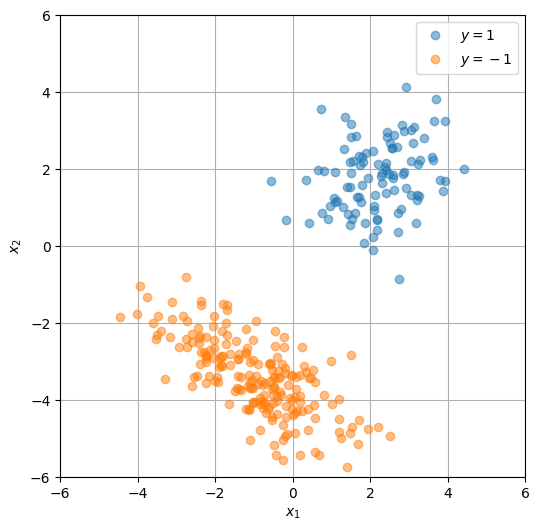

In [ ]:
np.random.seed(7030)
xp = np.random.randn(2,100)
xp[0,:] += 0.2*xp[1,:]
xp += 6*np.random.rand(2,1)
yp = np.ones(xp.shape[1])

xn = np.random.randn(2,200)
xn[0,:] -= 1*xn[1,:]
xn += -6*np.random.rand(2,1)
yn = -np.ones(xn.shape[1])

X = np.vstack((xp.T, xn.T))
y = np.hstack((yp, yn))

plt.figure(figsize=(6,6), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()

In [ ]:
def solve_svm(X, y, lam=1):

  import cvxpy as cp

  w = cp.Variable(X.shape[1])
  b = cp.Variable()

  obj = cp.sum(cp.pos(1-cp.multiply(y,(X@w-b))))
  reg = cp.sum_squares(w)
  problem = cp.Problem(cp.Minimize(obj + lam*reg))
  problem.solve(solver=cp.CLARABEL)

  return w.value, b.value, obj.value, reg.value

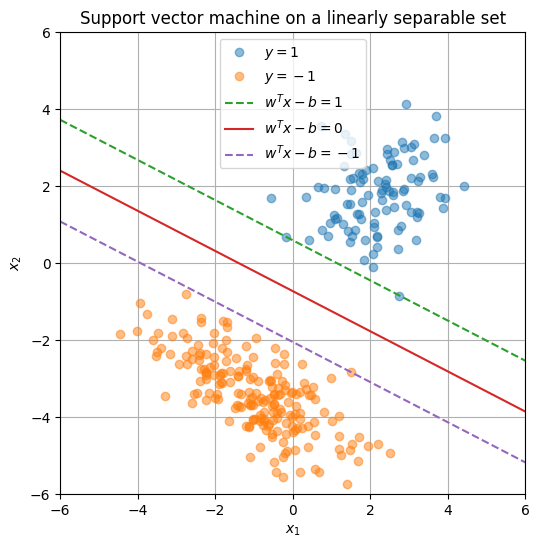

Loss: 1.0398348848639216e-12
Margin: 1.1709001048371943


In [ ]:
w_svm, b_svm, obj, reg = solve_svm(X, y, 1)

v1 = np.arange(-8, 8, 0.01)
v2 = (b_svm     - w_svm[0]*v1)/w_svm[1]
vp = (b_svm + 1 - w_svm[0]*v1)/w_svm[1]
vn = (b_svm - 1 - w_svm[0]*v1)/w_svm[1]

plt.figure(figsize=(6,6), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.plot(v1, vp, '--', label=r'$w^Tx-b=1$')
plt.plot(v1, v2,       label=r'$w^Tx-b=0$')
plt.plot(v1, vn, '--', label=r'$w^Tx-b=-1$')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.title('Support vector machine on a linearly separable set')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()

print(f'Loss: {obj}')
print(f'Margin: {1/np.sqrt(reg)}')

<br>

The same approach will do a good job on a linearly non-separable dataset, however in this case the loss is always positive.

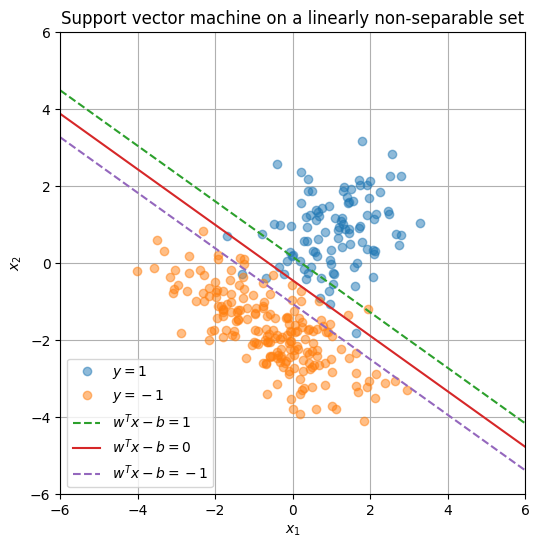

Loss: 20.320000262722843
Margin: 0.4945546934313733


In [ ]:
np.random.seed(7030)
xp = np.random.randn(2,100)
xp[0,:] += 0.2*xp[1,:]
xp += 3*np.random.rand(2,1)
yp = np.ones(xp.shape[1])

xn = np.random.randn(2,200)
xn[0,:] -= 1*xn[1,:]
xn += -3*np.random.rand(2,1)
yn = -np.ones(xn.shape[1])

X = np.vstack((xp.T, xn.T))
y = np.hstack((yp, yn))

w_svm, b_svm, obj, reg = solve_svm(X, y, 1)

v1 = np.arange(-8, 8, 0.01)
v2 = (b_svm     - w_svm[0]*v1)/w_svm[1]
vp = (b_svm + 1 - w_svm[0]*v1)/w_svm[1]
vn = (b_svm - 1 - w_svm[0]*v1)/w_svm[1]

plt.figure(figsize=(6,6), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.plot(v1, vp, '--', label=r'$w^Tx-b=1$')
plt.plot(v1, v2,       label=r'$w^Tx-b=0$')
plt.plot(v1, vn, '--', label=r'$w^Tx-b=-1$')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.title('Support vector machine on a linearly non-separable set')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()

print(f'Loss: {obj}')
print(f'Margin: {1/np.sqrt(reg)}')

<br>

### Logistic regression

Another popular classifier called the logistic regression can be obtained via the logistic loss function,

- For negative data, $y^{(i)}=-1$,

$$
  \ell(\tilde{y}) = \log\left(1+e^{\tilde{y}}\right)
$$

- For positive data, $y^{(i)}=1$,

$$
  \ell(\tilde{y}) = \log\left(1+e^{-\tilde{y}}\right)
$$

<br>

Hence the logistic regression problem is:

\begin{aligned}
  \underset{w,b}{\minimize} \quad& \sum_i \log \left(1 + e^{-y^{(i)}\left( w^T x^{(i)}-b\right)} \right) + \lambda
\| w\|_2^2
\end{aligned}


The following cell displays the logistic loss functions.

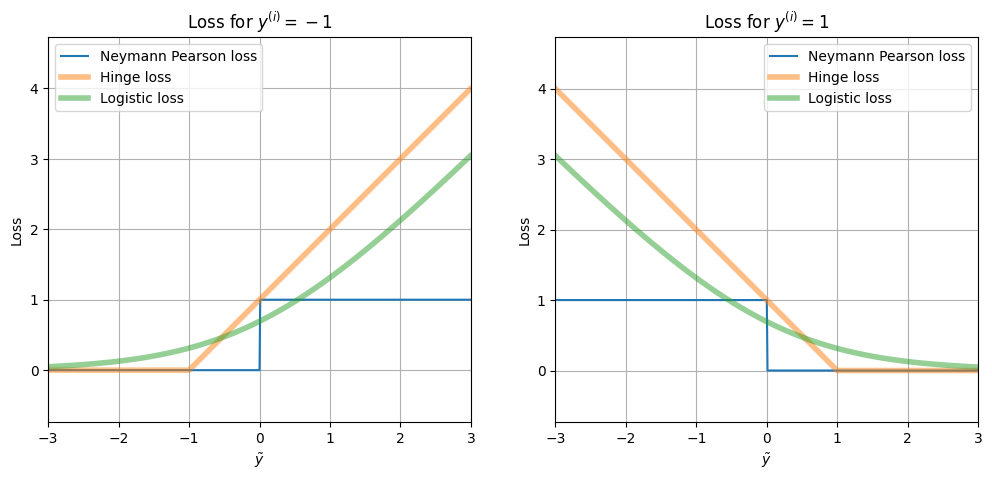

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ytilde = np.arange(-3, 3, 0.01)

plt.figure(figsize=(12,5), dpi=100)
plt.subplot(121)
plt.plot(ytilde, (ytilde>0), label='Neymann Pearson loss')
plt.plot(ytilde, np.maximum(1+ytilde,0), alpha=0.5, linewidth=4, label='Hinge loss')
plt.plot(ytilde, np.log(1+np.exp(ytilde)), alpha=0.5, linewidth=4, label='Logistic loss')
plt.grid(), plt.legend(), plt.axis('equal'), plt.xlim(-3, 3)
plt.xlabel(r'$\tilde{y}$'), plt.ylabel('Loss')
plt.title('Loss for $y^{(i)}=-1$')
plt.subplot(122)
plt.plot(ytilde, (ytilde<0), label='Neymann Pearson loss')
plt.plot(ytilde, np.maximum(1-ytilde,0), alpha=0.5, linewidth=4, label='Hinge loss')
plt.plot(ytilde, np.log(1+np.exp(-ytilde)), alpha=0.5, linewidth=4, label='Logistic loss')
plt.grid(), plt.legend(), plt.axis('equal'), plt.xlim(-3, 3)
plt.xlabel(r'$\tilde{y}$'), plt.ylabel('Loss')
plt.title('Loss for $y^{(i)}=1$')
plt.show()

In [ ]:
def solve_logistic_regression(X, y, lam=1):

  import cvxpy as cp

  w = cp.Variable(X.shape[1])
  b = cp.Variable()

  obj = cp.sum(cp.logistic(-cp.multiply(y,(X@w-b))))
  reg = cp.sum_squares(w)
  problem = cp.Problem(cp.Minimize(obj + lam*reg))
  problem.solve(solver=cp.CLARABEL)

  return w.value, b.value, obj.value, reg.value

<br>

Results from the support vector machine and the logistic classifier on the same data set are compared below.

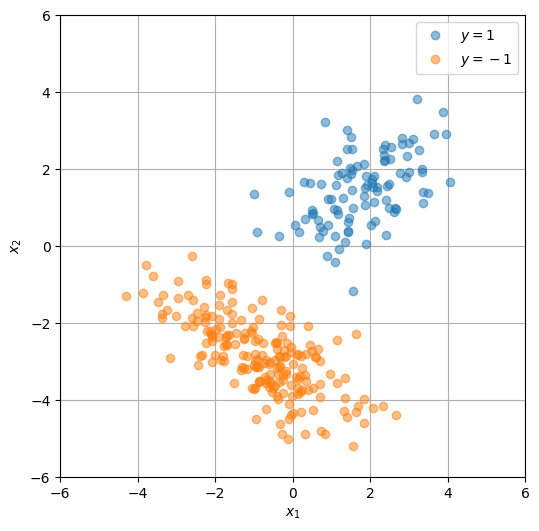

In [ ]:
np.random.seed(7030)
xp = np.random.randn(2,100)
xp[0,:] += 0.5*xp[1,:]
xp += 5*np.random.rand(2,1)
yp = np.ones(xp.shape[1])

xn = np.random.randn(2,200)
xn[0,:] -= xn[1,:]
xn += -5*np.random.rand(2,1)
yn = -np.ones(xn.shape[1])

X = np.vstack((xp.T, xn.T))
y = np.hstack((yp, yn))

plt.figure(figsize=(6,6), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()

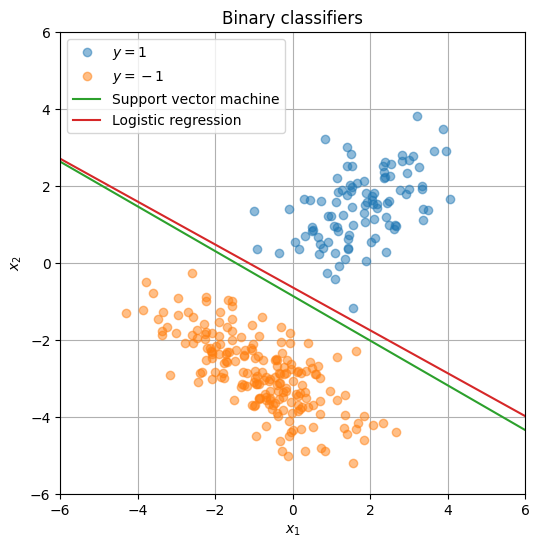

In [ ]:
w_svm, b_svm, obj_svm, reg_svm, = solve_svm(X, y, 1)
w_log, b_log, obj_log, reg_log, = solve_logistic_regression(X, y, 1)

v1_svm = np.arange(-8, 8, 0.01)
v2_svm = (b_svm - w_svm[0]*v1_svm)/w_svm[1]

v1_log = np.arange(-8, 8, 0.01)
v2_log = (b_log - w_log[0]*v1_log)/w_log[1]

plt.figure(figsize=(6,6), dpi=100)
plt.plot(xp[0,:], xp[1,:], 'o', alpha=0.5, label=r'$y=1$')
plt.plot(xn[0,:], xn[1,:], 'o', alpha=0.5, label=r'$y=-1$')
plt.plot(v1_svm, v2_svm, label='Support vector machine')
plt.plot(v1_log, v2_log, label='Logistic regression')
plt.xlabel(r'$x_1$'), plt.ylabel(r'$x_2$')
plt.title('Binary classifiers')
plt.xlim([-6, 6]), plt.ylim([-6, 6])
plt.legend(), plt.grid()
plt.show()